## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

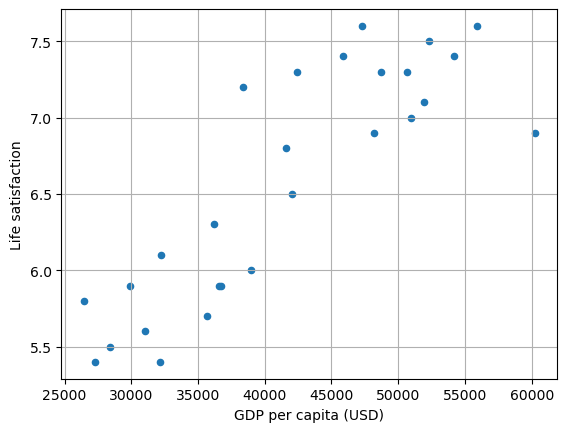

In [4]:
data = pd.read_csv('data/lifesat/lifesat.csv')
data.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y='Life satisfaction')
plt.show()

In [5]:
data.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [7]:
X = data[["GDP per capita (USD)"]].values
y = data[["Life satisfaction"]].values

model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.7272610933272654

In [9]:
X_new = [[37655.2]]
y_pred = model.predict(X_new)
y_pred

array([[6.30165767]])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 776.0+ bytes


In [11]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

model.fit(X, y)

model.predict(X_new)

array([[6.33333333]])

In [12]:
oecd = pd.read_csv('data/lifesat/oecd_bli.csv')
gdp = pd.read_csv('data/lifesat/gdp_per_capita.csv')

In [17]:
# get only year 2020
gdp_year = 2020
gdp_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp[gdp['Year'] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(['Code', 'Year'], axis=1)
gdp_per_capita.columns = ['Country', gdp_col]
gdp_per_capita.set_index('Country', inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [14]:
oecd.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [15]:
oecd = oecd[oecd['INEQUALITY'] == 'TOT']
oecd = oecd.pivot(index='Country', columns='Indicator', values='Value')

oecd.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [24]:
# merge two tables and keep life satisfaction and gdp per capita data
gdpsat = pd.merge(left=oecd, right=gdp_per_capita, left_index=True, right_index=True)
gdpsat.sort_values(by=gdp_col, inplace=True)
gdpsat = gdpsat[[gdp_col, lifesat_col]]
gdpsat.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [25]:
gdpsat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, South Africa to Luxembourg
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GDP per capita (USD)  36 non-null     float64
 1   Life satisfaction     36 non-null     float64
dtypes: float64(2)
memory usage: 864.0+ bytes


In [30]:
min_gdp = 23500
max_gdp = 62500

country_stats = gdpsat[(gdpsat[gdp_col] >= min_gdp) &
                        (gdpsat[gdp_col] <= max_gdp)]

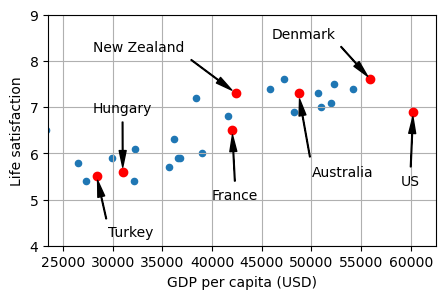

In [41]:
gdpsat.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdp_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdp_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = 'US' if country == 'United States' else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), 
                 xytext=pos_text, fontsize=10,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, 'ro')
    
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.show()

In [34]:
country_stats.to_csv('data/lifesat/stats_country.csv')

## Find a good model to best fit to data

(23500.0, 62500.0, 4.0, 9.0)

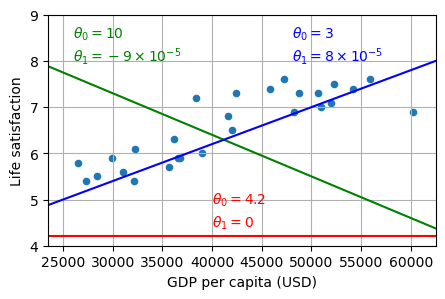

In [42]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdp_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])


In [43]:
X = country_stats[[gdp_col]].values
y = country_stats[[lifesat_col]].values

lin1 = LinearRegression()
lin1.fit(X, y)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
display('t0= ', t0, 't1= ', t1)

't0= '

3.749049427376909

't1= '

6.778899694341223e-05

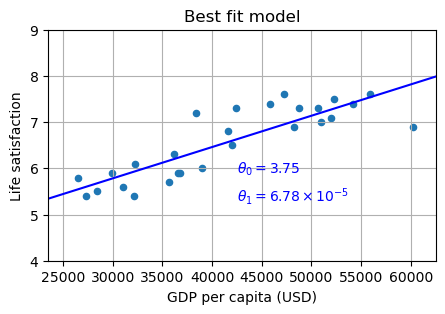

In [44]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdp_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.title('Best fit model')
plt.show()

In [46]:
missing_data = gdpsat[(gdpsat[gdp_col] < min_gdp) |
                                  (gdpsat[gdp_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


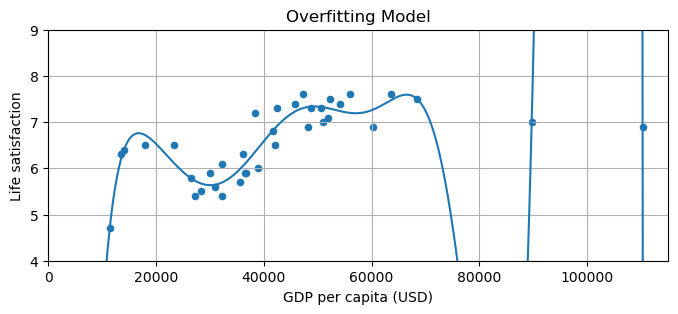

In [49]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

gdpsat.plot(kind='scatter', figsize=(8, 3), x=gdp_col, y=lifesat_col, grid=True)

poly = PolynomialFeatures(degree=10, include_bias=False)
scaler = StandardScaler()
lin2 = LinearRegression()

pipe_model = Pipeline([
    ('poly', poly),
    ('scaler', scaler),
    ('lin_reg', lin2),
])

X_train = np.c_[gdpsat[gdp_col]]
y_train = np.c_[gdpsat[lifesat_col]]

X = np.linspace(0, 115000, 1000)

pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X[:, np.newaxis])

plt.plot(X, y_pred)
plt.axis([0, 115_000, min_life_sat, max_life_sat])
plt.title("Overfitting Model")
plt.show()

In [51]:
lin3 = LinearRegression()
lin3.fit(X_train, y_train)
t0full, t1full = lin3.intercept_[0], lin3.coef_[0][0]

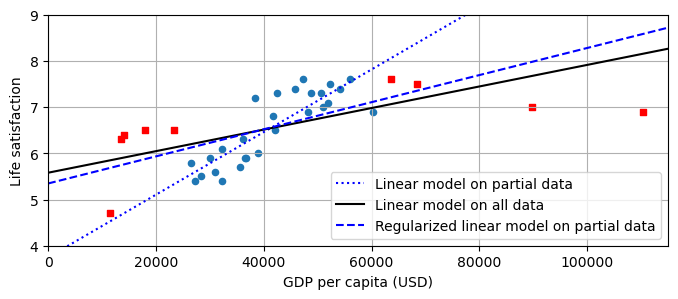

In [54]:
from sklearn.linear_model import Ridge

country_stats.plot(kind='scatter', x=gdp_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdp_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = Ridge(alpha=10**9.5)
X_sample = country_stats[[gdp_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

plt.show()